<a href="https://colab.research.google.com/github/Shuchenhe/307FINAL/blob/main/2023_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023 Spring ORF307 Final Project

Instructor: B. Stellato

AIs: I. Wang, V. Ranjan, S. Clarke, J. Ge


---


## Instructions

**Exam files**: the exam files are available to download at [this link.](https://www.dropbox.com/sh/yrg048z0bf4r79u/AADyT6nduBgfebH1tPaNGxPxa?dl=0)

**Date and time:** from May 12, 2023 at 00:01am to May 17, 2023 at 11:59pm.

- Total time after download: 24 hours. No late submissions allowed.


<!-- **Exercises:** there are 4 problems worth a total of 100 points. -->

## Exam rules

- You are allowed to use all course materials on the midterm (lecture notes, books, precept materials, code, and homeworks). But you cannot use internet to search for answers.

- You have to justify all your answers. If you use code from the course materials, you have to explain what each step means.

- You cannot communicate with anyone during the exam.

- No late submissions allowed. Make sure your submission goes through on time. You can resubmit as many times as you like until your time expires.

- The exam is to be submitted electronically on Gradescope before 11:59pm on the final day. Please follow the [\texttt{Gradescope guide}](https://gradescope-static-assets.s3-us-west-2.amazonaws.com/help/submitting_hw_guide.pdf) upload the PDF version of your exam.

---

$Honor \hspace{0.5cm} Code$

I pledge my honor that I do not violate the University Honor Code during the exam

/s/ Shuchen He

In [238]:
# Install required packages
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc cm-super dvipng
!pip install pypandoc
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript javascript-common
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libharfbuzz-icu0 libidn11
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpdfbox-java
  libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data preview-latex-style
  rake ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-rec

In [240]:
%cd drive/MyDrive/ORF307/final/
!jupyter nbconvert --to PDF "sh3770_final.ipynb"

[Errno 2] No such file or directory: 'drive/MyDrive/ORF307/final/'
/content/drive/MyDrive/ORF307/final
[NbConvertApp] WARNING | pattern 'sh3770_final.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer ye

# Final Exam

## Portfolio Optimization

You are a portfolio manager who is given $n = 11$ stocks to invest in:

    - AMD, AMZN, BAC, GOOG, GS, K, KO, META, NKE, SHEL, SPY
    
Specifically, your goal is to decide a vector of weights $w \in {\bf R}^{n}$, where $w_i$ is the fraction of your portfolio that you allocate to stock $i$.

To decide these weights, you are given historical data for these 11 stocks for every trading day from 02/01/2023 to 04/28/2023 ($T = 61$ total trading days). The data can be found in the `returns.csv` file, which we import as the returns matrix $R \in {\bf R}^{T \times n}$. The data file contains percentages, so we divide by 100 when forming the matrix R.
An entry $R_{ti}$ then contains the (decimal) return on trading day $t$ for the price of stock $i$ (negative values correspond to a loss). We define the the vector of daily average returns per asset as $\mu = (R^T {\bf 1}) / T$.

In [ ]:
import numpy as np
np.set_printoptions(precision=4)  # Print few decimal places
np.set_printoptions(suppress=True)  # Suppress scientific notation
import cvxpy as cp
import pandas as pd
from numpy.linalg import cholesky as llt
import matplotlib.pyplot as plt

In [21]:
# read the data
irl = 'https://raw.githubusercontent.com/Shuchenhe/307FINAL/main/returns.csv'
# I did the same thing in my HW4, where, for unknown reason I cannot
# read files directly from my google drive. Therefore, I upload the 
# file to github and then access github from my colab. 
returns = pd.read_csv(irl)
returns

,AMD,AMZN,BAC,GOOG,GS,K,KO,META,NKE,SHEL,SPY
0,12.63,1.96,1.24,1.56,-0.03,-0.47,0.02,2.79,1.70,-0.83,1.06
1,4.34,7.38,0.58,7.27,1.03,-0.92,-1.71,23.28,-0.34,-1.18,1.46
2,-2.51,-8.43,0.83,-3.29,0.13,-0.03,-0.75,-1.19,-1.12,1.16,-1.06
3,-2.80,-1.17,-0.16,-1.66,0.23,2.07,0.57,-0.25,-1.47,-0.77,-0.61
4,2.66,-0.07,1.10,4.42,0.97,-1.46,-0.17,2.99,-0.32,3.04,1.31
...,...,...,...,...,...,...,...,...,...,...,...
56,-0.97,-0.70,-0.37,0.82,0.67,0.40,-0.16,-0.05,1.24,0.88,0.10
57,-4.31,-3.43,-3.09,-2.03,-1.30,1.38,-0.16,-2.46,-1.91,-2.08,-1.59
58,2.55,2.35,-1.39,-0.15,-0.86,-0.13,-0.47,0.89,-0.66,-0.36,-0.42
59,1.75,4.61,1.58,3.75,1.50,1.21,0.20,13.93,1.50,0.31,1.99


In [22]:
tickers = list(returns)
tickers

['AMD', 'AMZN', 'BAC', 'GOOG', 'GS', 'K', 'KO', 'META', 'NKE', 'SHEL', 'SPY']

In [23]:
R = returns.to_numpy() / 100 # convert percentages to decimals when forming R
T, n = R.shape
R.shape

(61, 11)

In [24]:
mu = R.T @ np.ones(T) / T
mu

array([ 0.0033,  0.0007, -0.0029,  0.0016, -0.0009,  0.0003,  0.0008,
        0.0086,  0.    ,  0.001 ,  0.0004])

### Part A: Least Squares (25 points)

For a portfolio with constant weight $w$ over the entire historical time period, the returns are given by $r = Rw$. In this scenario, we aim to choose a $w$ that would have worked well in the past with the hope that it will work well in the future. Over the time series of length $T$, the average return is given by ${\bf avg}(r) = {\bf 1}^T r/T$ and the risk, or standard derivation, is given by ${\bf std}(r) = \lVert r - {\bf avg}(r){\bf 1} \rVert / \sqrt{T}$.

1. (6 points) Our goal is to find portfolio normalized weights $w$ that minimize the risk given a target daily mean return $\rho$. Formulate such a problem using constrained least squares.

$Q1$

To formulate this problem using constrained least squares, we first note that the variance is the square of the standard deviation. $Var(r) = std(r)^2$. Besides, since we need to find the normalized weights, so the sum of weights of each asset should be equal to 1. As required by the question, we also need to make $avg(r) = \rho$. Hence, we formulate our problem as the following: 
$$ 
\begin{array}{ll}
&\\
\mbox{minimize} &\lVert R\omega - \rho1 \rVert^2_2/T\\ 
\text{subject to} & 1^T \omega = 1\\
& 1^TR\omega / T = \rho\\
&\\
\end{array}
$$ Where R, T, $\rho$, are given. Since T is given constant, the formulation above is equivalent to 
$$ 
\begin{array}{ll}
&\\
\mbox{minimize} &\lVert R\omega - \rho1 \rVert^2_2\\ 
\text{subject to} & 1^T \omega = 1\\
& 1^TR\omega / T = \rho\\
&\\
\end{array}
$$

2. (6 points) You believe, due to new economic developments, that it would be wise to specifically set aside some amount of your portfolio to the S&P 500 Index (stock 11, ticker SPY, in the data). So, you decide that you will always set aside 10% of your portfolio to buy stock in SPY. Add this constraint to the constrained least squares problem.

$Q2$


Since we are required to $always$ set aside 10% of the portfolio to the last (11th) stock, SPY, we will just have to ensure that the last (11th) number of array $\omega$ to be exactly 0.1. Therefore, our new formulation becomes: 
$$ 
\begin{array}{ll}
&\\
\mbox{minimize} &\lVert R\omega - \rho1 \rVert^2_2\\ 
\text{subject to} & 1^T \omega = 1\\
& 1^TR\omega / T = \rho\\
& e_{11}^T\omega = 0.1\\
\text{where} & e_{11} =  \begin{pmatrix}
0 \\
0 \\
0 \\
0 \\ 
0 \\
0 \\
0\\
0\\
0\\
0\\
1 
\end{pmatrix}
\end{array}
$$

3. (6 points) Write the KKT linear system for the optimality conditions for the constrained least squares problem that you created in question 2.

**$Q3$**

We first re-write our problem in the format of $$ 
\begin{array}{ll}
&\\
\mbox{minimize} &\lVert Ax - b \rVert^2_2\\ 
\text{subject to} & Cx = d \\
&\\
\end{array}
$$ so the KKT condition will be the following linear system: 


$$
\begin{bmatrix}
2A^TA & C^T \\
C & 0 \\
\end{bmatrix} \begin{bmatrix}
x \\
z*\\
\end{bmatrix} = \begin{bmatrix}
2A^Tb \\
d\\
\end{bmatrix} 
$$
In our case, 
$$
A = R \in {\bf R}^{T^{*}n = 61^{*}11} \\ b = \rho1 \in {\bf R}^{T =61}\\
C = \begin{bmatrix}
1^T \\
1^TR\\
e_{11}^T
\end{bmatrix} \in {\bf R}^{3^{*}11}\\
d = \begin{bmatrix}
1 \\
\rho T\\
0.1
\end{bmatrix}\in {\bf R}^{3}\\
x = \omega \in {\bf R}^{n = 11}\\
$$ Therefore, the linear system becomes 

$$
\begin{bmatrix}
2R^TR & 1 & R^T1 & e_{11} \\
1^T & 0 & 0 & 0 \\
1^TR & 0 & 0 & 0\\
e_{11}^T & 0 & 0 &0
\end{bmatrix} \begin{bmatrix}
\omega \\
z_1\\
z_2 \\
z_3
\end{bmatrix} = \begin{bmatrix}
2 \rho R^T1 \\
1\\
\rho T \\
0.1
\end{bmatrix}
$$

Note that we can also write $\mu = (R^T {\bf 1}) / T$. If we do so, the KKT matrix will be $$
\begin{bmatrix}
2R^TR & 1 & \mu & e_{11} \\
1^T & 0 & 0 & 0 \\
\mu^T & 0 & 0 & 0\\
e_{11}^T & 0 & 0 &0
\end{bmatrix} \begin{bmatrix}
\omega \\
z_1\\
z_2 \\
z_3
\end{bmatrix} = \begin{bmatrix}
2 \rho T \mu \\
1\\
\rho\\
0.1
\end{bmatrix}
$$
But the two systems are equivalent. 

4. (7 points) Say we want to observe a certain return $\eta$ over the entire 3-month period. Since $\rho$ represents target average daily return, the two are related by $\rho = \eta / T$. For $\eta = 5\%, 10\%, 20\%$, solve the constrained linear system that you created in question 2 to find the optimal weights. For each weight vector $w$, plot the historical (average) returns vs time.

In [135]:
# below is eta = 0.05 
import numpy as np
eta = 0.05 
rho = eta / T 
# now, solve the KKT system 
# building the large linear system for KKT
e_11 = np.array([0,0,0,0,0,0,0,0,0,0,1])
zeros = np.zeros([3,3])
ones_11 = np.ones(11)
r_t_r = 2 * R.T @ R
ones_61 = np.ones(61)
r_t_1 = R.T @ ones_61 
temp = [ones_11, r_t_1, e_11] #c_transpose
c_transpose = np.array(temp)
c_transpose = np.transpose(c_transpose)
c = np.transpose(c_transpose) #c
KKT = np.block([[r_t_r,c_transpose],
          [c,zeros]]) #kkt matrix
rhs_1 = r_t_1*2*rho
rhs_2_4 = np.array([1,rho*T,0.1])
rhs = np.concatenate((rhs_1,rhs_2_4)) # this is the right hand side 
# now, solve the linear system 
KKT_1 = np.linalg.inv(KKT)
X = np.matmul(KKT_1,rhs) # solution of KKT linear system 
# the top 11th of elements of this matrix is 
# the vector omega we want to find. 
omega_005 = np.delete(X,[11,12,13])

array([ 0.0529,  0.044 ,  0.0079,  0.0055, -0.0833,  0.3388,  0.405 ,
       -0.0073, -0.0216,  0.1582,  0.1   ])

In [137]:
# now, we do this again for eta = 0.1 
eta = 0.1 
rho = eta / T
rhs_1 = r_t_1*2*rho
rhs_2_4 = np.array([1,rho*T,0.1])
rhs = np.concatenate((rhs_1,rhs_2_4)) # this is the right hand side 
# now, solve the linear system 
KKT_1 = np.linalg.inv(KKT)
X = np.matmul(KKT_1,rhs) # solution of KKT linear system 
# the top 11th of elements of this matrix is 
# the vector omega we want to find. 
omega_010 = np.delete(X,[11,12,13])

array([ 0.0616, -0.0036, -0.0596, -0.0305, -0.1043,  0.2528,  0.5393,
        0.0574, -0.0013,  0.1882,  0.1   ])

In [139]:
# now, we do this again for eta = 0.20
eta = 0.2
rho = eta / T
rhs_1 = r_t_1*2*rho
rhs_2_4 = np.array([1,rho*T,0.1])
rhs = np.concatenate((rhs_1,rhs_2_4)) # this is the right hand side 
# now, solve the linear system 
KKT_1 = np.linalg.inv(KKT)
X = np.matmul(KKT_1,rhs) # solution of KKT linear system 
# the top 11th of elements of this matrix is 
# the vector omega we want to find. 
omega_020 = np.delete(X,[11,12,13]) 

array([ 0.0789, -0.0988, -0.1947, -0.1023, -0.1463,  0.0807,  0.808 ,
        0.1868,  0.0394,  0.2483,  0.1   ])

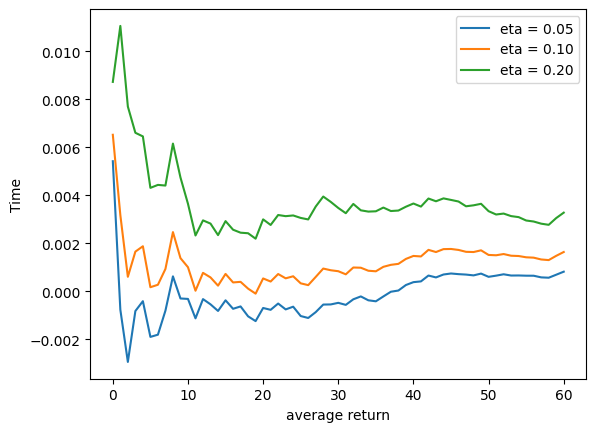

In [150]:
# now, we have accquired three normalized weights omega for eta = 0.05,0.1,0.2
# we then plot the historical return vs time
return_005 = R @ omega_005 #daily return of 005
return_010 = R @ omega_010 #daily return of 010
return_020 = R @ omega_020 #daily return of 020
# now calculate the calculate the daily return array 
sum_005 = 0
sum_010 = 0 
sum_020 = 0 
avg_005 = np.zeros(61) #average return array 
avg_010 = np.zeros(61)
avg_020 = np.zeros(61)
for i in range(T):
  sum_005 = sum_005 + return_005[i]
  avg_005[i] = sum_005/(1+i)
  sum_010 = sum_010 + return_010[i]
  avg_010[i] = sum_010/(1+i)
  sum_020 = sum_020 + return_020[i]
  avg_020[i] = sum_020/(1+i)
plt.plot(avg_005,label='eta = 0.05')
plt.plot(avg_010,label='eta = 0.10')
plt.plot(avg_020,label='eta = 0.20')
plt.xlabel('average return')
plt.ylabel('Time')
plt.legend()
plt.show()

### Part B: Linear programming (25 points)

For this part, rather than setting a target mean return, we aim to minimize the risk-return tradeoff with risk-aversion parameter $\lambda > 0$. In particular, we will consider $\lVert Rw - (\mu^T w) {\bf 1} \rVert_1/T$ as a proxy for the risk, instead of using the risk definition from part A. Also, we will only consider long portfolios, i.e. without short-selling. 

5. (5 points) Formulate the above problem of finding the optimal normalized weights as a piecewise linear optimization problem (you can keep the norm expressions explicit for now)

$Q5$

We can now formulate the question as 
$$ 
\begin{array}{ll}
&\\
\mbox{minimize} & -\mu^T \omega + \lambda \lVert R\omega - (\mu^T \omega ){\bf 1}\rVert_1 / T \\
\text{subject to} & {\bf 1}^T \omega = 1\\
& \omega \ge 0
&\\
\end{array}
$$ 

6. (5 points) Formulate this in CVXPY. For 100 values of $\lambda$, logarithmically spaced in the range $[10^{-1}, 10^{2}]$, solve the problem. For each optimal $w$, plot the average daily historical return vs risk for varying $\lambda$.

    **Note:** If you choose to use a `cp.Parameter()` for $\lambda$, you will need to pass the flag `nonneg=True` to enforce it to be nonnegative. Also, you can use a `np.logspace()` to create the logarithmically spaced $\lambda$ values.

**Q6**

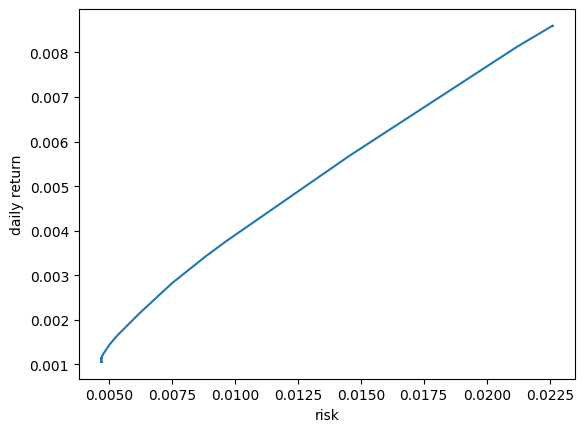

In [203]:
# Q6
# solve this in CVXPY 
lambda_arr = np.logspace(-1,2,num = 100) #first create 100-lambda array
risk_arr = np.zeros(100)
return_arr = np.zeros(100)
for i in range(100):
  x = cp.Variable(11)
  ones_61 = np.ones(T)
  ones_11 = np.ones(11)
  objective = (-mu.T @ x + lambda_arr[i] * cp.norm(R @ x - (mu.T@x)*ones_61, 1)/T) #define the objective
  constraints = [ones_11.T @ x == 1, x >= 0] #two constraints 
  problem = cp.Problem(cp.Minimize(objective),constraints)
  problem.solve()
  return_arr[i] = mu.T @ x.value
  risk_arr[i] = (objective.value + return_arr[i])/(lambda_arr[i]) # we derive this from the objective equation 
plt.plot(risk_arr,return_arr)
plt.xlabel('risk')
plt.ylabel('daily return')
plt.show()

7. (5 points) Write this problem as an LP.

$Q7$

We formulat this problem as LP in the following: 

$$ 
\begin{array}{ll}
&\\
\mbox{minimize} & -\mu^T \omega + (\lambda / T) {\bf 1}^Tv \\
\text{subject to} & {\bf 1}^T \omega = 1\\
& \omega \ge 0 \\
&  R\omega - (\mu^T \omega ){\bf 1}\leq v\\
&  -(R\omega - (\mu^T \omega ){\bf 1}) \leq v
&\\
\end{array}
$$ 

8. (5 points) Take the dual of the LP you wrote in question 7. 
    
you can use the identity $ (\mu^T w) {\bf 1} = Sw $ where 
$$
    S = \begin{bmatrix}
           - & \mu^T & - \\
             & \vdots &  \\
           - & \mu^T & -
           \end{bmatrix}. 
$$

9. (5 points) Formulate the dual problem with $\lambda=1$ and solve it in CVXPY. Print the value of the dual variable that corresponds to the primal constraint $w \geq 0$. What does it tell you about the optimal primal variable $w$ and the corresponding stock weights in the portfolio?

In [212]:
# Q9 Borrows this from Q6, and directly find the dual. 
# solve this in CVXPY 
x = cp.Variable(11)
lambda_1 = 1
ones_61 = np.ones(T)
ones_11 = np.ones(11)
objective = (-mu.T @ x +  cp.norm(R @ x - (mu.T@x)*ones_61, 1)/T) #define the objective, set lambda = 1 
constraints = [ones_11.T @ x == 1, x >= 0] #two constraints 
problem = cp.Problem(cp.Minimize(objective),constraints)
problem.solve()
print("A dual solution that corresponds to omega >= 0 is")
print(problem.constraints[1].dual_value) #[1] because omega >= 0 is the second constraint
print("The primal solution is") 
print(x.value)

A dual solution that corresponds to omega >= 0 is
[0.     0.0026 0.0056 0.0033 0.003  0.     0.     0.     0.0003 0.
 0.0019]
The primal solution is
[0.0485 0.     0.     0.     0.     0.221  0.5713 0.0523 0.     0.1069
 0.    ]


Due to the complementary slackness, optimal primal $\omega_i \neq 0$ , when dual solution equals to 0, and $\omega = 0$ when the dual solution $ \neq 0$, for $i$ in range (11). We can observe that from above. That means if we choose to long some stocks in the primal formulation, we will not put any weights to those stocks in the dual formulation. Nevertheless, the optimal value of the two formulation should be the same, also due to the argument of complementary slackness. 

### Part C: Integer programming for sparse allocations (25 points)

Consider, again, the risk-return trade off minimization problem with the 1-norm defined in Part B. Now, suppose that we are prohibited from holding more than $k$ stocks in our porfolio (i.e. $k < n$).

10. (6 points) Formulate the new constraint in terms of the *cardinality* of $w$. Then, formulate such constraints using a big-$M$ formulation and add them to the problem. What is the smallest value of $M$ that you can use to encode the cardinality constraints?  

$Q10$

The new constraint will be $\text{card}\omega \leq k$ which is equivalent to $\lVert \omega\rVert_0 \leq k$ Now, using the big-M formulation and add it to the problem, we get the following: 

$$ 
\begin{array}{ll}
&\\
\mbox{minimize} & -\mu^T \omega + \lambda \lVert R\omega - (\mu^T \omega ){\bf 1}\rVert_1 / T \\
\text{subject to} & {\bf 1}^T \omega = 1\\
& \omega \ge 0 \\
& \sum_{i=1}^{11} y_{i} \leq k \ \\ 
& -My_i \leq \omega_i \leq My_i, \hspace{0.5cm} i = 1,2,...,11 \\
& y_i \in \{0,1\}\\
&\\
\end{array}
$$ 

**The smallest Big-M we can use is 1**. Since the constraint ${\bf 1}^T \omega = 1, \omega \ge 0$ indicate that the largest value omega can take is 1.

11. (7 points) Solve the new integer program with $\lambda = 10$ and $k=5$. Print out the optimal objective value. For the optimal solution, which stocks have nonzero weight? 

In [213]:
pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 42.7 MB/s eta 0:00:00


In [220]:
# now add the cardinality constraint into our program 
x = cp.Variable(11)
k = 5
ones_61 = np.ones(T)
ones_11 = np.ones(11)
#define the objective, set lambda = 10
objective = (-mu.T @ x +  10*cp.norm(R @ x - (mu.T@x)*ones_61, 1)/T) 
y = cp.Variable(11, boolean=True) #define the boolean variable y 
#add the cardinality constraint
constraints = [ones_11.T @ x == 1, x >= 0,ones_11.T @ y <= k, x <= y, x >= -y] 
problem = cp.Problem(cp.Minimize(objective),constraints)
problem.solve()
print("The objective value is")
print(problem.value) 
print("The optimal solution is") 
print(x.value) 

The objective value is
0.04599417261421225
The optimal solution is
[ 0.0727 -0.     -0.     -0.     -0.      0.3587  0.4093  0.0416 -0.
  0.1177 -0.    ]


**AMD, K, KO, META, SHEL** have nonzero weight. 

12. (6 points) Relax the integrality constraints from your formulation in question 11 and solve the corresponding problem in CVXPY. Print out the optimal objective value. For the optimal solution, which stocks have nonzero weight? To account for numerical issues, we will say that a component $w_i$ is nonzero if it is larger than $10^{-8}$.

$Q12$

Now, we relax the integrality constraints, so the question becomes the following: 

$$ 
\begin{array}{ll}
&\\
\mbox{minimize} & -\mu^T \omega + 10 \lVert R\omega - (\mu^T \omega ){\bf 1}\rVert_1 / T \\
\text{subject to} & {\bf 1}^T \omega = 1\\
& \omega \ge 0 \\
& {\bf 1}^Ty \leq 5 \ \\ 
& -My_i \leq \omega_i \leq My_i, \hspace{0.5cm} i = 1,2,...,11 \\
& M = 1
&\\
\end{array}
$$ 

In [221]:
# now solve the relaxiation problem in CVXPY 
x = cp.Variable(11)
y = cp.Variable(11) #remove the integer constraint. 
k = 5
ones_61 = np.ones(T)
ones_11 = np.ones(11)
#define the objective, set lambda = 10
objective = (-mu.T @ x +  10*cp.norm(R @ x - (mu.T@x)*ones_61, 1)/T) 
constraints = [ones_11.T @ x == 1, x >= 0,ones_11.T @ y <= k, x <= y, x >= -y] 
problem = cp.Problem(cp.Minimize(objective),constraints)
problem.solve()
print("The objective value is")
print(problem.value) 
print("The optimal solution is") 
print(x.value) 

The objective value is
0.04591573865619526
The optimal solution is
[0.0503 0.     0.     0.     0.     0.2468 0.5084 0.0468 0.0483 0.0993
 0.    ]


**Now, AMD, SHEL, NKE, META, KO, and K**, 6 in total, have nonzero weights. 


13. (6 points) A common way to relax cardinality constraints is to replace it directly with the 1-norm. Perform this relaxation and solve the corresponding problem in CVXPY. Print out the optimal objective value and solution. Did either of these relaxations (this one or the one in question 12) give a better bound on the objective value? Explain your answer.

$Q13$

After the relaxation, the problem becomes the following: 
$$ 
\begin{array}{ll}
&\\
\mbox{minimize} & -\mu^T \omega + 10 \lVert R\omega - (\mu^T \omega ){\bf 1}\rVert_1 / T \\
\text{subject to} & {\bf 1}^T \omega = 1\\
& \omega \ge 0 \\
& \lVert \omega \rVert_1 \leq 5
&\\
\end{array}
$$ 

In [226]:
# solve this in CVXPY
x = cp.Variable(11)
y = cp.Variable(11) #remove the integer constraint. 
k = 5
ones_61 = np.ones(T)
ones_11 = np.ones(11)
#define the objective, set lambda = 10
objective = (-mu.T @ x +  10*cp.norm(R @ x - (mu.T@x)*ones_61, 1)/T) 
constraints = [ones_11.T @ x == 1, x >= 0,cp.norm(x,1)<= 5] 
problem = cp.Problem(cp.Minimize(objective),constraints)
problem.solve()
print("The objective value is")
print(problem.value) 
print("The optimal solution is") 
print(x.value) 

The objective value is
0.045915738656195235
The optimal solution is
[0.0503 0.     0.     0.     0.     0.2468 0.5084 0.0468 0.0483 0.0993
 0.    ]


**Still, AMD, SHEL, NKE, META, KO, and K**, 6 in total, have nonzero weights.Both objective values are smaller than the integer LP so both had a better , lower bound. This makes sense, since the relaxation of the integer LP is very likely to expand the feasible region (which means less constraints), and therefore give us a better value usually. Only in the luckiest case, where the optimal solution of the relaxed LP falls on an integer verte, the integer programming can get a bound as good as the relaxed ones'. 

### Part D: Integer programming for sparse trades (25 points)

Consider, again, the risk-return trade off minimization problem from part B. In this part, suppose that we have a current portfolio allocation $w^{\rm cur}= (1/n){\bf 1}$, i.e., a uniform portfolio with equal weight in all stocks. With the historical data, we want to minimize the risk-return tradeoff, while, at the same time, penalizing trades. In fact, trades can turn out quite expensive if performed too often.

This means we would like to penalize difference between the new portfolio weights and the current ones, i.e., $w - w^{\rm cur}$. In particular, we would like to penalize the number of nonzeros in that difference, which correspond to individual trades. 

14. (6 points) Adjust the problem to enforce a maximum of 5 deviations from $w^\text{cur}$ and formulate it as a mixed-integer LP.

$Q14$

Since $w^{\rm cur}= (1/n){\bf 1}, n = 11$, $w^{\rm cur}_i = 1/11$. Therefore, we formulate the LP as the folllwing: 

$$ 
\begin{array}{ll}
&\\
\mbox{minimize} & -\mu^T \omega + \lambda \lVert R\omega - (\mu^T \omega ){\bf 1}\rVert_1 / T \\
\text{subject to} & {\bf 1}^T \omega = 1\\
& \omega \ge 0 \\
& \sum_{i=1}^{11} y_{i} \leq 5 \ \\ 
& -My_i \leq (\omega_i - w^{\rm cur}_i) = (w_i - 1/11) \leq My_i, \hspace{0.5cm} i = 1,2,...,11 \\
& y_i \in \{0,1\}\\
&\\
\end{array}
$$ 

We keep M here the same with Part C's M, i.e. M = 1. Now, formulate the 1-norm as an LP, we have 
$$ 
\begin{array}{ll}
&\\
\mbox{minimize} & -\mu^T \omega + \lambda v / T \\
\text{subject to} & {\bf 1}^T \omega = 1\\
& \omega \ge 0 \\
& \ R\omega - (\mu^T \omega ){\bf 1} \leq v \\
& \ -(R\omega - (\mu^T \omega )){\bf 1}\leq v \\
& \sum_{i=1}^{11} y_{i} \leq 5 \ \\ 
& -My_i \leq (\omega_i - w^{\rm cur}_i) = (w_i - 1/11) \leq My_i, \hspace{0.5cm} i = 1,2,...,11 \\
& y_i \in \{0,1\}\\
&\\
\end{array}
$$ 

15. (6 points) Solve the new problem with CVXPY with $\lambda = 1$, print the average return and risk, and verify that $w-w^\text{cur}$ has at most 5 nonzero values.

In [228]:
# now add the new cardinality constraint into our program 
x = cp.Variable(11)
y = cp.Variable(11, boolean=True) #define the boolean variable y 
k = 5
ones_61 = np.ones(T)
ones_11 = np.ones(11)
#define the objective, set lambda = 10
objective = (-mu.T @ x +  cp.norm(R @ x - (mu.T@x)*ones_61, 1)/T) #set lambda = 1 
#add the cardinality constraint
constraints = [ones_11.T @ x == 1, x >= 0,ones_11.T @ y <= k, 
               x <= y + 1/11, x >= -y + 1/11] # formulate the 1/11 constraint
problem = cp.Problem(cp.Minimize(objective),constraints)
problem.solve()
print("The average return is")
print(mu.T @ x.value) 
print("The risk is") 
print(problem.value + mu.T @ x.value) # we derive this from the objective formula
print("The optimal weight is")
print(x.value)

The average return is
0.0015874813710879281
The risk is
0.006125723779042778
The optimal weight is
[ 0.0909 -0.     -0.      0.     -0.      0.0909  0.4545  0.0909  0.0909
  0.0909  0.0909]


**Since 1/11 = 0.0909, we can clearly verify from above that (at most) 5 (No.2,3,4,5,7) have non-zero differences.**

16. (6 points) Solving the last problem can take a long time in large dimensions. We would like to solve a similar version that induces sparsity. Replace the hard constraints in question 14 with a 1-norm penalization in the objective, weighted by coefficient $\beta$. Formulate the problem as a LP.

Now, we first formulate the problem with 1-norm.
$$ 
\begin{array}{ll}
&\\
\mbox{minimize} & -\mu^T \omega + \lambda \lVert R\omega - (\mu^T \omega ){\bf 1}\rVert_1 / T + \beta \lVert \omega - \omega^{cur}\rVert_1 \\
\text{subject to} & {\bf 1}^T \omega = 1\\
& \omega \ge 0 \\
&\\
\end{array}
$$ Now, we formulate the above into LP: 
$$ 
\begin{array}{ll}
&\\
\mbox{minimize} & -\mu^T \omega + \lambda v / T + \beta x\\
\text{subject to} & {\bf 1}^T \omega = 1\\
& \omega \ge 0 \\
& \ R\omega - (\mu^T \omega ){\bf 1} \leq v \\
& \ -(R\omega - (\mu^T \omega )){\bf 1}\leq v \\
& \omega - \omega^{cur} = \omega - 1/11 \leq x \\
& -(\omega - \omega^{cur}) \leq x \\
&\\
\end{array}
$$ 

17. (7 points) Formulate the problem in CVXPY with parameters $\lambda, \beta$. Fix $\lambda = .1$, and solve the problem for 100 logarithmically spaced values of $\beta$ in the range $[10^{-3}, 10^{-2}]$. For each $\beta$ and corresponding optimal solution $w$, plot the number of nonzero values of $w-w^{\rm cur}$ vs. $\beta$, with $\beta$ on a logarithmic x axis. Again, to account for numerical issues, we will say that a component $(w-w^{\rm cur})_i$ is nonzero if $\lvert (w - w^{\rm cur})_i \rvert \geq 10^{-7}$. What do you notice?

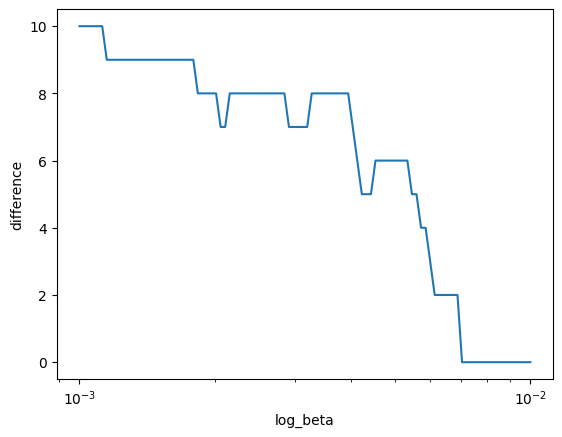

In [237]:
# Q17
# solve this in CVXPY 
import math
lambda_1 = 1 
beta_arr = np.logspace(-3,-2,num = 100) #first create 100-beta array
difference_arr = np.zeros(100)
for i in range(100):
  x = cp.Variable(11)
  ones_61 = np.ones(T)
  ones_11 = np.ones(11)
  objective = (-mu.T @ x + lambda_1 * cp.norm(R @ x - (mu.T@x)*ones_61, 1)/T 
               + beta_arr[i]*cp.norm(x - 1/11*ones_11,1)) #define the objective, with different beta
  constraints = [ones_11.T @ x == 1, x >= 0] #two constraints 
  problem = cp.Problem(cp.Minimize(objective),constraints)
  problem.solve()
  for j in range (11):
    if abs(x.value[j] - 1/11) >= 10e-7:
      difference_arr[i] = difference_arr[i] + 1
plt.plot(beta_arr,difference_arr)
plt.xscale('log')
plt.xlabel('log_beta')
plt.ylabel('difference')
plt.show()

**Discoveries:** 

The larger the $\beta$, the smaller the difference.This makes sense, because as $\beta$ grows larger and larger, the punishment of trading becomes more and more serious. I also discover that to make the number of difference less or equal to 5, I can just keep $\beta$ somewhere around 0.007,when $\lambda = 1$, but also notice that the number of difference drops very quickly around 0.01. 